# Deep Q-Network Training

In this worksheet we are going to go over training a Reinforcement Learning (RL) agent trained on ATARI 2600 games. We will use the famous game of pong as a our training test bed.

One can download the code required to train the DQN agent at https://sites.google.com/a/deepmind.com/dqn/

## Setup
We first start by setting up a function to update our lua path so that DQN related classes can be loaded.

In [1]:
require 'cutorch'
require 'cunn'
require 'alewrap'

torch.setdefaulttensortype('torch.FloatTensor')
torch.setnumthreads(4)

## Game Environment
We create an RL environment that wraps an ATARI game so that we can train an agent.
The agent will have no knowledge of what game it is playing.

In [2]:
-- Create the Game Object
game_options = {
    -- name of the game to play (you need the ROM file for this game)
    env='pong',
    -- directory where the ROMS are stored
    game_path='/home/ubuntu/torch/install/share/lua/5.1/dqn/roms/',
    -- we want get RGB frames
    env_params = {useRGB = true},
    -- we will repeat each action 4 times
    actrep = 4,
    -- for every new episode, play null actions a random number of time [0,30]
    random_starts = 30,
    -- use gpu
    gpu = 1,
    -- have some info logs
    verbose = 2
}
game_env = alewrap.GameEnvironment(game_options)
game_actions = game_env:getActions()


Playing:	pong	


In [3]:
-- These are the valid actions for this game. The total possible action set is in (0-17)
print(game_actions)

{
  1 : 0
  2 : 3
  3 : 4
}



## The Agent
We create an agent that can **learn to play** any game

In [4]:
require 'dqn'

agent_params = {
    -- The agent only knows about actions it can take in the environment
    actions = game_actions,
    -- we will use gpu
    gpu = 1,
    -- we will print info
    verbose = 2,
    -- learning rate for SGD
    lr=0.00025,
    -- Random exploration ratio, start from 100% exploration
    ep=1,
    -- Drop down to 10% exploration
    ep_end=0.1,
    -- Linear decay over 1M steps
    ep_endt=1000000,
    -- Discount factor \gamma for Q-Learning
    discount=0.99,
    -- Number of frames to input into convolutional net
    hist_len=4,
    -- Learning starts after a delay of 50K actions, we do not want to overfit onto early experience
    learn_start=50000,
    -- We will store last 1M transitions
    replay_memory=1000000,
    -- We will update every 4 actions
    update_freq=4,
    -- Will update only once
    n_replay=1,
    -- Network spec
    network= "dqn.convnet_atari3",
    -- pre-processing spec (just scale down to grayscale 84x84)
    preproc="dqn.net_downsample_2x_full_y",
    -- size of inputs after rescale (84*84)
    state_dim=7056,
    -- size of minibatch for SGD
    minibatch_size=32,
    -- we will scale reward values to limit to 1,-1
    rescale_r=1,
    -- we use Y channel
    ncols=1,
    -- buffer on GPU
    bufferSize=512,
    -- set of validation transitions to track training progress
    valid_size=500,
    -- update target Q network every 10K updates
    target_q=10000,
    -- we will clip errors that go into DQN
    clip_delta=1,
    -- clip reward between -1,1
    min_reward=-1,
    -- clip reward between -1,1
    max_reward=1
}
agent = dqn.NeuralQLearner(agent_params)

Creating Agent Network from dqn.convnet_atari3	


nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> output]
  (1): nn.Reshape(4x84x84)
  (2): nn.SpatialConvolution(in: 4, out: 32, kW: 8, kH: 8, dW: 4, dH: 4, padding: 1)
  (3): nn.Rectifier
  (4): nn.SpatialConvolution(in: 32, out: 64, kW: 4, kH: 4, dW: 2, dH: 2)
  (5): nn.Rectifier
  (6): nn.SpatialConvolution(in: 64, out: 64, kW: 3, kH: 3)
  (7): nn.Rectifier
  (8): nn.Reshape(3136)
  (9): nn.Linear(3136 -> 512)
  (10): nn.Rectifier
  (11): nn.Linear(512 -> 3)
}
{
  gradInput : CudaTensor - empty
  modules : 
    {
      1 : 
        nn.Reshape(4x84x84)
        {
          nelement : 28224
          _input : CudaTensor - empty
          output : CudaTensor - size: 1x4x84x84
          gradInput : CudaTensor - empty
          size : LongStorage - size: 3
          _gradOutput : CudaTensor - empty
          batchsize : LongStorage - size: 4
        }
      2 : 
        nn.SpatialConvolution(in: 4, out: 32, kW: 8, kH: 8, dW: 4, dH:

finput : CudaTensor - empty
          fgradInput : CudaTensor - empty
          gradBias : CudaTensor - size: 32
          weight : CudaTensor - size: 32x4x8x8
          bias : CudaTensor - size: 32
          gradWeight : CudaTensor - size: 32x4x8x8
          padding : 1
          nInputPlane : 4
          kW : 8
          kH : 8
        }
      3 : 
        nn.Rectifier
        {
          gradInput : CudaTensor - empty
          output : CudaTensor - size: 1x32x20x20
        }
      4 : 
        nn.SpatialConvolution(in: 32, out: 64, kW: 4, kH: 4, dW: 2, dH: 2)
        {
          dH : 2
          dW : 2
          nOutputPlane : 64
          output : CudaTensor - size: 1x64x9x9
          gradInput : CudaTensor - empty
          finput : CudaTensor - empty
          fgradInput : CudaTensor - empty
          gradBias : CudaTensor - size: 64
          weight : CudaTensor - size: 64x32x4x4
          bias : CudaTensor - size: 64
          gradWeight : CudaTensor - size: 64x32x4x4
        

          gradInput : CudaTensor - empty
          finput : CudaTensor - empty
          fgradInput : CudaTensor - empty
          gradBias : CudaTensor - size: 64
          weight : CudaTensor - size: 64x64x3x3
          bias : CudaTensor - size: 64
          gradWeight : CudaTensor - size: 64x64x3x3
          padding : 0
          nInputPlane : 64
          kW : 3
          kH : 3
        }
      7 : 
        nn.Rectifier
        {
          gradInput : CudaTensor - empty
          output : CudaTensor - size: 1x64x7x7
        }
      8 : 
        nn.Reshape(3136)
        {
          nelement : 3136
          _input : CudaTensor - empty
          output : CudaTensor - empty
          gradInput : CudaTensor - empty
          size : LongStorage - size: 1
          _gradOutput : CudaTensor - empty
          batchsize : LongStorage - size: 2
        }
      9 : 
        nn.Linear(3136 -> 512)
        {
          gradBias : CudaTensor - size: 512
          weight : CudaTensor - size: 512x3

          gradWeight : CudaTensor - size: 3x512
          output : CudaTensor - empty
        }
    }
  output : CudaTensor - empty
}
Convolutional layers flattened output size:	3136	


## Logs to Track
We will log the following quantities to track training

In [5]:
-- The following quantities are collected during evaluation of the agent

-- How many times did the agent end up in reward states
reward_counts = {}
-- How many episodes did the agent finish
episode_counts = {}
-- How long does it take to learn/test
time_history = { 0 }
-- The reward agent gets during testing
reward_history = {}

-- The following are training measures collected by agent during training

-- Maximum q-value during training
qmax_history = {}
-- Value of the validation states
v_history = {}
-- TD error over the validation states
td_history = {}


## What does the input to agent look like?
The current state of the game can be grabbed by getState() fucnction call on the environment.

In [6]:

screen, reward, terminal = game_env:getState()
print({screen = screen, reward = reward, terminal = terminal})


{
  reward : 0
  screen : CudaTensor - size: 1x3x210x160
  terminal : false
}


## What does the game look like?
We can play some random actions and look at the screens. We should be able to play animations with ipython!

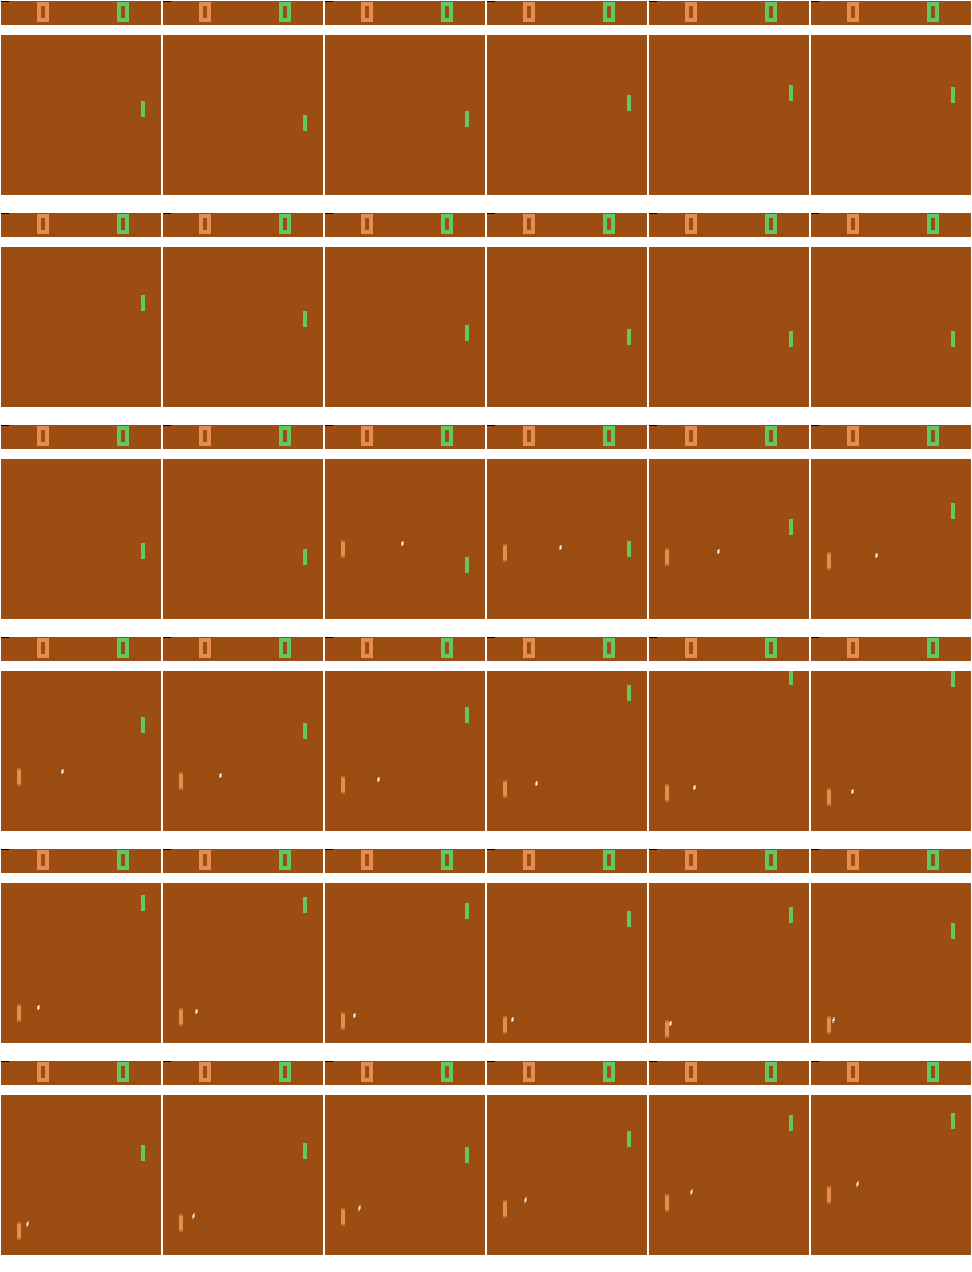

In [7]:
local screens = {}
for i=1,36 do
    local screen, reward, terminal = game_env:step(game_actions[torch.random(3)])
    table.insert(screens, screen[1]:clone())
end
itorch.image(screens)

## Training
Now we will train the agent to play the game

In [8]:
-- Training options
opt = {
    -- number of evaluation steps
    eval_steps = 125000,
    -- frequency of evaluation
    eval_freq = 250000,
    -- total number of training steps
    steps = 50000000,
    -- frequency of progress reporting
    prog_freq = 10000,
    -- frequency to save agent on disk
    save_freq = 125000,
    -- filename for saved agent
    name = 'Itorch_DQN3_0_1_pong_FULL_Y',
    -- we want to use random starts of up to 30 nil steps
    random_starts = 30,
    -- we repeat every action 4 times
    actrep = 4,
}

In [ ]:

local total_reward
local nrewards
local nepisodes
local episode_reward

local learn_start = agent.learn_start
local start_time = sys.clock()
local step = 0

print("Iteration ..", step)
while step < opt.steps do
    step = step + 1
    local action_index = agent:perceive(reward, screen, terminal)

    -- game over? get next game!                                                                                                                      
    if not terminal then
        screen, reward, terminal = game_env:step(game_actions[action_index], true)
    else
        if opt.random_starts > 0 then
            screen, reward, terminal = game_env:nextRandomGame()
        else
            screen, reward, terminal = game_env:newGame()
        end
    end

    if step % opt.prog_freq == 0 then
        assert(step==agent.numSteps, 'trainer step: ' .. step ..
                ' & agent.numSteps: ' .. agent.numSteps)
        print("Training Steps: ", step)
        agent:report()
        collectgarbage()
    end

    if step%1000 == 0 then collectgarbage() end

    if step % opt.eval_freq == 0 and step > learn_start then

        print('Evaluating')
        screen, reward, terminal = game_env:newGame()

        total_reward = 0
        nrewards = 0
        nepisodes = 0
        episode_reward = 0

        local eval_time = sys.clock()
        for estep=1,opt.eval_steps do
            local action_index = agent:perceive(reward, screen, terminal, true, 0.05)
            -- Play game in test mode (episodes don't end when losing a life)                                                                         
            screen, reward, terminal = game_env:step(game_actions[action_index])

            if estep%1000 == 0 then collectgarbage() end

            -- record every reward                                                                                                                    
            episode_reward = episode_reward + reward
            if reward ~= 0 then
               nrewards = nrewards + 1
            end

            if terminal then
                total_reward = total_reward + episode_reward
                episode_reward = 0
                nepisodes = nepisodes + 1
                screen, reward, terminal = game_env:nextRandomGame()
            end
        end

        eval_time = sys.clock() - eval_time
        start_time = start_time + eval_time
        agent:compute_validation_statistics()
        local ind = #reward_history+1
        total_reward = total_reward/math.max(1, nepisodes)

        if #reward_history == 0 or total_reward > torch.Tensor(reward_history):max() then
            agent.best_network = agent.network:clone()
        end

        if agent.v_avg then
            v_history[ind] = agent.v_avg
            td_history[ind] = agent.tderr_avg
            qmax_history[ind] = agent.q_max
        end
        print("V", v_history[ind], "TD error", td_history[ind], "Qmax", qmax_history[ind])

        reward_history[ind] = total_reward
        reward_counts[ind] = nrewards
        episode_counts[ind] = nepisodes
        time_history[ind+1] = sys.clock() - start_time

        local time_dif = time_history[ind+1] - time_history[ind]

        local training_rate = opt.actrep*opt.eval_freq/time_dif

        print(string.format(
            '\nSteps: %d (frames: %d), reward: %.2f, epsilon: %.2f, lr: %G, ' ..
            'training time: %ds, training rate: %dfps, testing time: %ds, ' ..
            'testing rate: %dfps,  num. ep.: %d,  num. rewards: %d',
            step, step*opt.actrep, total_reward, agent.ep, agent.lr, time_dif,
            training_rate, eval_time, opt.actrep*opt.eval_steps/eval_time,
            nepisodes, nrewards))
    end

    if step % opt.save_freq == 0 or step == opt.steps then
        local filename = opt.name
        torch.save(filename .. ".t7", {
                                reward_history = reward_history,
                                reward_counts = reward_counts,
                                episode_counts = episode_counts,
                                time_history = time_history,
                                v_history = v_history,
                                td_history = td_history,
                                qmax_history = qmax_history,
                                opt = opt})
-- we are not going to bother saving agents for now.
--         torch.save(filename .. "_agent.t7", {
--                                 agent = agent,
--                                 best_model = agent.best_network,
--             })
        print('Saved:', filename .. '.t7')
        io.flush()
        collectgarbage()
    end
end



Iteration ..	0	
